## Week 4, Lab 2: Predicting Chronic Kidney Disease in Patients
> Author: Matt Brems

We can sketch out the data science process as follows:
1. Define the problem.
2. Obtain the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.
6. Answer the problem.

In this lab, we're going to focus on steps exploring data, building models and evaluating the models we build.

There are three links you may find important:
- [A set of chronic kidney disease (CKD) data and other biological factors](./chronic_kidney_disease_full.csv).
- [The CKD data dictionary](./chronic_kidney_disease_header.txt).
- [An article comparing the use of k-nearest neighbors and support vector machines on predicting CKD](./chronic_kidney_disease.pdf).

## Step 1: Define the problem.

Suppose you're working for Mayo Clinic, widely recognized to be the top hospital in the United States. In your work, you've overheard nurses and doctors discuss test results, then arrive at a conclusion as to whether or not someone has developed a particular disease or condition. For example, you might overhear something like:

> **Nurse**: Male 57 year-old patient presents with severe chest pain. FDP _(short for fibrin degradation product)_ was elevated at 13. We did an echo _(echocardiogram)_ and it was inconclusive.

> **Doctor**: What was his interarm BP? _(blood pressure)_

> **Nurse**: Systolic was 140 on the right; 110 on the left.

> **Doctor**: Dammit, it's an aortic dissection! Get to the OR _(operating room)_ now!

> _(intense music playing)_

In this fictitious but [Shonda Rhimes-esque](https://en.wikipedia.org/wiki/Shonda_Rhimes#Grey's_Anatomy,_Private_Practice,_Scandal_and_other_projects_with_ABC) scenario, you might imagine the doctor going through a series of steps like a [flowchart](https://en.wikipedia.org/wiki/Flowchart), or a series of if-this-then-that steps to diagnose a patient. The first steps made the doctor ask what the interarm blood pressure was. Because interarm blood pressure took on the values it took on, the doctor diagnosed the patient with an aortic dissection.

Your goal, as a research biostatistical data scientist at the nation's top hospital, is to develop a medical test that can improve upon our current diagnosis system for [chronic kidney disease (CKD)](https://www.mayoclinic.org/diseases-conditions/chronic-kidney-disease/symptoms-causes/syc-20354521).

**Real-world problem**: Develop a medical diagnosis test that is better than our current diagnosis system for CKD.

**Data science problem**: Develop a medical diagnosis test that reduces both the number of false positives and the number of false negatives.

---

## Step 2: Obtain the data.

### 1. Read in the data.

In [60]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [2]:
import os
os.getcwd()

'/Users/annamitchell/Desktop/GA_Docs/Labs/lab_4.02'

In [303]:
data = pd.read_csv('/Users/annamitchell/Desktop/GA_Docs/Datasets/chronic_kidney_disease_full.csv')

In [304]:
data.shape

(400, 25)

In [305]:
data.head(2)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd


In [306]:
data.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

In [307]:
data['class'].value_counts()

ckd       250
notckd    150
Name: class, dtype: int64

### 2. Check out the data dictionary. What are a few features or relationships you might be interested in checking out?

Answer: 

I would be interested in checking out sugar, age, bacteria, sodium, white blook cell count, and appetite. 

---

## Step 3: Explore the data.

### 3. How much of the data is missing from each column?

In [175]:
data.isnull().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

### 4. Suppose that I dropped every row that contained at least one missing value. (In the context of analysis with missing data, we call this a "complete case analysis," because we keep only the complete cases!) How many rows would remain in our dataframe? What are at least two downsides to doing this?

> There's a good visual on slide 15 of [this deck](https://liberalarts.utexas.edu/prc/_files/cs/Missing-Data.pdf) that shows what a complete case analysis looks like if you're interested.

Answer:

We have a total of 400 rows, and if we removed the rows with missing values, we would be left with 158 rows. If we did in fact remove them, our sample size would dimish in size and would invalidate the accuracy of the model at some point. Also, just because there is missing data, the rest of the column holds very valuable information. 

### 5. Thinking critically about how our data were gathered, it's likely that these records were gathered by doctors and nurses. Brainstorm three potential areas (in addition to the missing data we've already discussed) where this data might be inaccurate or imprecise.

Answer: 

(1) It might depend on where this data was taken from in a geographical sense. What part of the country was used for the samples? 
(2) Nurses/Drs might be biased on what information they deem important to the study. 
(3) Also, was this issue studied alot at the hospital where these samples were taken? They may have alot of data to begin with on this, which might be biased. 

---

## Step 4: Model the data.

### 6. Suppose that I want to construct a model where no person who has CKD will ever be told that they do not have CKD. What (very simple, no machine learning needed) model can I create that will never tell a person with CKD that they do not have CKD?

> Hint: Don't think about `statsmodels` or `scikit-learn` here.

Answer: 

The model we would need to create needs to tell every person they have CKD. 
False Positives: Type 1 error, only error that could occur here 

### 7. In problem 6, what common classification metric did we optimize for? Did we minimize false positives or negatives?

Answer: 

We optimized for sensitivity, or recall. We minimized false negatives to be 0. 

### 8. Thinking ethically, what is at least one disadvantage to the model you described in problem 6?

Answer: 

Thinking ethically, we have to think about the people who do not have CKD. What are we doing to their world when we tell them they have a disease they do not have? We are inciting fear, further unnecessary testing, panic, and even financial issues if the patient does not in fact, have CKD.

### 9. Suppose that I want to construct a model where a person who does not have CKD will ever be told that they do have CKD. What (very simple, no machine learning needed) model can I create that will accomplish this?

Answer: 

We would need to create a model that told every person that did not have CKD, regardless of what their biomarkers said. 

False Negatives, or Type II error 

### 10. In problem 9, what common classification metric did we optimize for? Did we minimize false positives or negatives?

Answer: 

This one would be optimized for specificity. This included minimizing false positives. 

### 11. Thinking ethically, what is at least one disadvantage to the model you described in problem 9?

Answer: 

From an ethical standpoint, we are not telling a patient that they have a disease when they actually do. 

### 12. Construct a logistic regression model in `sklearn` predicting class from the other variables. You may scale, select/drop, and engineer features as you wish - build a good model! Make sure, however, that you include at least one categorical/dummy feature and at least one quantitative feature.

> Hint: Remember to do a train/test split!

In [308]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [309]:
import warnings
warnings.filterwarnings("ignore")

In [310]:
#code on how to map and work with dummies was adapted from stackoverflow.com 

data['class'] = data['class'].map({'ckd': 1, 'notckd': 0})
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,1
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,1
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,1
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,1
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,1


In [311]:
data.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

In [312]:
#data1 = data

In [313]:
data = pd.get_dummies(data)

In [314]:
data.drop(columns = ['dm_no', 'cad_no', 'appet_poor', 'pe_no', 'ane_no', 'rbc_normal', 'pc_normal', 'pcc_notpresent', 'ba_notpresent', 'htn_no'], inplace = True)

In [315]:
data.isnull().sum()

age               9
bp               12
sg               47
al               46
su               49
bgr              44
bu               19
sc               17
sod              87
pot              88
hemo             52
pcv              71
wbcc            106
rbcc            131
class             0
rbc_abnormal      0
pc_abnormal       0
pcc_present       0
ba_present        0
htn_yes           0
dm_yes            0
cad_yes           0
appet_good        0
pe_yes            0
ane_yes           0
dtype: int64

In [316]:
data.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'pcv', 'wbcc', 'rbcc', 'class', 'rbc_abnormal', 'pc_abnormal',
       'pcc_present', 'ba_present', 'htn_yes', 'dm_yes', 'cad_yes',
       'appet_good', 'pe_yes', 'ane_yes'],
      dtype='object')

In [317]:
data = data.fillna(data.mean())

In [318]:
data.isnull().sum()

age             0
bp              0
sg              0
al              0
su              0
bgr             0
bu              0
sc              0
sod             0
pot             0
hemo            0
pcv             0
wbcc            0
rbcc            0
class           0
rbc_abnormal    0
pc_abnormal     0
pcc_present     0
ba_present      0
htn_yes         0
dm_yes          0
cad_yes         0
appet_good      0
pe_yes          0
ane_yes         0
dtype: int64

In [319]:
data.shape

(400, 25)

In [320]:
#going through all my columns to check for all numeric info 
data['ane_yes'].value_counts()

0    340
1     60
Name: ane_yes, dtype: int64

In [321]:
column_list = list(data.columns)

In [322]:
v_features = []

In [415]:
#trying out my list comprehension skills to get numeric columns and excluding my y variable
#this code adapted from datacamp.com


[v_features.append(col) for col in column_list if col != 'class']

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [416]:
v_features

['age',
 'bp',
 'sg',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wbcc',
 'rbcc',
 'rbc_abnormal',
 'pc_abnormal',
 'pcc_present',
 'ba_present',
 'htn_yes',
 'dm_yes',
 'cad_yes',
 'appet_good',
 'pe_yes',
 'ane_yes',
 'age',
 'bp',
 'sg',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wbcc',
 'rbcc',
 'rbc_abnormal',
 'pc_abnormal',
 'pcc_present',
 'ba_present',
 'htn_yes',
 'dm_yes',
 'cad_yes',
 'appet_good',
 'pe_yes',
 'ane_yes']

In [417]:
# Setting my X and my y
X = data[v_features]
y = data['class']

In [326]:
X.shape

(400, 24)

In [327]:
y.shape

(400,)

In [328]:
poly = PolynomialFeatures(include_bias=False, degree=2)

In [329]:
X_poly = poly.fit_transform(X)

In [330]:
# Train/test splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=42)

In [331]:
#instantiate and fit the standard scalar
ss = StandardScaler()

In [332]:
ss.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [333]:
StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [334]:
#scaling the test and traing x
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

In [335]:
logreg = LogisticRegression()

In [336]:
logreg.fit(X_train_sc, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [337]:
#logreg.coef_

In [338]:
logreg.score(X_train_sc, y_train)

1.0

In [339]:
logreg.score(X_test_sc, y_test)

1.0

---

## Step 5: Evaluate the model.

### 13. Based on your logistic regression model constructed in problem 12, interpret the coefficient of one of your quantitative features.

In [250]:
logreg.coef_

array([[-2.99589625e-02,  1.91396276e-01, -1.21334427e+00,
         1.88893769e-01,  7.83257996e-02,  1.57571458e-01,
         1.46185528e-02,  1.86088128e-01, -5.20658114e-02,
        -1.78587152e-02, -3.28102368e-01, -1.50915020e-01,
         6.78039309e-02, -2.12190078e-01,  5.32874982e-02,
         4.91941603e-02,  6.99720724e-03,  2.58046273e-03,
         7.45004707e-02,  9.19491368e-02,  2.96542018e-04,
        -1.77162810e-01,  1.23534083e-01,  7.56451148e-03,
         2.92171801e-01,  1.48991728e-01, -4.10541262e-02,
         5.58886614e-02,  3.66128034e-02,  2.19142741e-01,
        -1.85020700e-02,  1.34110034e-01, -5.23794783e-02,
        -3.08606451e-02, -2.52971917e-01, -2.50147395e-01,
         8.38466058e-02, -1.01286261e-01,  3.38311605e-02,
         5.50969983e-02,  7.03411809e-03,  2.21983920e-03,
         7.36746374e-02,  8.14795954e-02,  2.85441427e-04,
        -1.52832029e-01,  7.16180066e-02,  6.16312943e-03,
         2.10443545e-01,  1.60177665e-01,  1.93120638e-0

In [251]:
#np.exp()

### 14. Based on your logistic regression model constructed in problem 12, interpret the coefficient of one of your categorical/dummy features.

In [ ]:
My age coefficient is -0.7692514. This means that as age increases by 1 year, a person is -0.7 times as likely to have CKD

### 15. Despite being a relatively simple model, logistic regression is very widely used in the real world. Why do you think that's the case? Name at least two advantages to using logistic regression as a modeling technique.

Answer: 

(1) It is very easy to implement and very efficient to train, simple and can predict probabilities. 
(2) It share similar properties to linear regression

### 16. Does it make sense to generate a confusion matrix on our training data or our test data? Why? Generate it on the proper data.

> Hint: Once you've generated your predicted $y$ values and you have your observed $y$ values, then it will be easy to [generate a confusion matrix using sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).

In [340]:
predictions = logreg.predict(X_test_sc)

In [341]:
X_train.shape

(300, 324)

In [342]:
X_test.shape

(100, 324)

In [343]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)

In [257]:
cm 

array([[35,  0],
       [ 0, 65]])

In [258]:
#this code adapted from statisticsbyjim.com

cm = pd.DataFrame(cm, columns = ['Predicted Negative', 'Predicted Positive'], index =['Actual Negative', 'Actual Positive'])

In [259]:
cm

,Predicted Negative,Predicted Positive
Actual Negative,35,0
Actual Positive,0,65


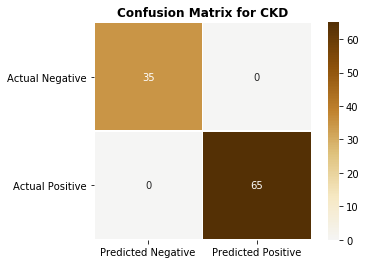

In [260]:
plt.title('Confusion Matrix for CKD', fontweight='bold')
sns.heatmap(pd.DataFrame(cm), annot=True, square=True, linewidth=0.5, 
            center=0, cmap="BrBG_r",)  #cbar=False)
plt.yticks(rotation=0);

### 17. In this hospital case, we want to predict CKD. Do we want to optimize for sensitivity, specificity, or something else? Why? (If you don't think there's one clear answer, that's okay! There rarely is. Be sure to defend your conclusion!)

Answer: Overall, we want to optimize for both, but if we were down to choosing one, we would want to optimize for sensitivity. Regardless of which one we choose, we have to consider the alternative. With specificity, we need to make sure we are maximizing our true positives and minimizing our false positives. Although this may generally sound good(at this point, we are only telling people who actually have CKD that they have the disease), we are assurdurdly leaving a potential risk for missing those who, according to our model, are on th eborder line and may or may not have the disease. We are shining a bigger light by optimizing for sensitivity, even if we do have more false positives. 

### 18 (BONUS). Write a function that will create an ROC curve for you, then plot the ROC curve.

Here's a strategy you might consider:
1. In order to even begin, you'll need some fit model. Use your logistic regression model from problem 12.
2. We want to look at all values of your "threshold" - that is, anything where .predict() gives you above your threshold falls in the "positive class," and anything that is below your threshold falls in the "negative class." Start the threshold at 0.
3. At this value of your threshold, calculate the sensitivity and specificity. Store these values.
4. Increment your threshold by some "step." Maybe set your step to be 0.01, or even smaller.
5. At this value of your threshold, calculate the sensitivity and specificity. Store these values.
6. Repeat steps 3 and 4 until you get to the threshold of 1.
7. Plot the values of sensitivity and 1 - specificity.

In [344]:
logreg.predict_proba(X_test)[:10]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [418]:
#copied and altered code from lesson 4.03, lesson metrics 

# create pred_df 
# 1. The list of true values of our test set.
# 2. The list of predicted probabilities based on our model.

pred_proba = [i[1] for i in logreg.predict_proba(X_test)]

# The value of each y along with the probability of being 1
pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})

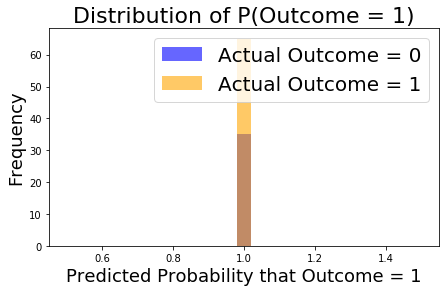

In [346]:
#copied and altered code from lesson 4.03, lesson metrics 

# Create figure.
plt.figure(figsize = (7,4))

# Create two histograms of observations.
plt.hist(pred_df[pred_df['true_values'] == 0]['pred_probs'],
         bins = 25,
         color = 'b',
         alpha = 0.6,
         label = 'Actual Outcome = 0')
plt.hist(pred_df[pred_df['true_values'] == 1]['pred_probs'],
         bins = 25,
         color = 'orange',
         alpha = 0.6,
         label = 'Actual Outcome = 1')

# Label axes.
plt.title('Distribution of P(Outcome = 1)', fontsize = 22)
plt.ylabel('Frequency', fontsize = 18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize = 18)

# Create legend.
plt.legend(fontsize = 20);

In [ ]:
#I tried to do this, but failed, could not get the ROC curve to display correctly. still left my code so you
#could see the attempt

In [377]:
#copied and altered code from lesson 4.03, lesson metrics 

# Create figure.
#plt.figure(figsize = (8,6))

# Create threshold values.
#thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
#def TPR(df, true_col, pred_prob_col, threshold):
    #true_positive = data[(data[true_col] == 1) & (data[pred_prob_col] >= threshold)].shape[0]
    #false_negative = data[(data[true_col] == 1) & (data[pred_prob_col] < threshold)].shape[0]
    #return true_positive / (true_positive + false_negative)
    

# Define function to calculate 1 - specificity. (False positive rate.)
#def FPR(df, true_col, pred_prob_col, threshold):
    #true_negative = data[(data[true_col] == 0) & (data[pred_prob_col] <= threshold)].shape[0]
    #false_positive = data[(data[true_col] == 0) & (data[pred_prob_col] > threshold)].shape[0]
    #return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
#tpr_values = [TPR(data, 'true_values', 'pred_probs', prob) for prob in thresholds]
#fpr_values = [FPR(data, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot ROC curve.
#plt.plot(fpr_values, # False Positive Rate on X-axis
         #tpr_values, # True Positive Rate on Y-axis
         #label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
#plt.plot(np.linspace(0, 1, 200),
          #np.linspace(0, 1, 200),
         #label='baseline',
         #linestyle='--')

# Label axes.
#plt.title('Receiver Operating Characteristic Curve', fontsize=22)
#plt.ylabel('Sensitivity \n (True Positive Rate)', fontsize=18)
#plt.xlabel('1 - Specificity \n (False Positive Rate)', fontsize=18)

# Create legend.
#plt.legend(fontsize=16);

### 19. Suppose you're speaking with the biostatistics lead at Mayo Clinic, who asks you "Why are unbalanced classes generally a problem? Are they a problem in this particular CKD analysis?" How would you respond?

Answer: If your model has an accuracy score of 100%, it not a good model. In our situation, we are saying there is no CKD when we know that to not be true. We need to be careful of making sure that CKD does not go undiagnosed. 

### 20. Suppose you're speaking with a doctor at Mayo Clinic who, despite being very smart, doesn't know much about data science or statistics. How would you explain why unbalanced classes are generally a problem to this doctor?

Answer: I would say, hey take a class on stats. It will change your life...

I would try my best to convey exactly what I said in question 19. Don't trust models that have an accuracy score of 100%, and if we form our thoughts around the fact that there is no CKD, then that can lead to alot of CKD going undiagnosed.

### 21. Let's create very unbalanced classes just for the sake of this example! Generate very unbalanced classes by [bootstrapping](http://stattrek.com/statistics/dictionary.aspx?definition=sampling_with_replacement) (a.k.a. random sampling with replacement) the majority class.

1. The majority class are those individuals with CKD.
2. Generate a random sample of size 200,000 of individuals who have CKD **with replacement**. (Consider setting a random seed for this part!)
3. Create a new dataframe with the original data plus this random sample of data.
4. Now we should have a dataset with around 200,000 observations, of which only about 0.00075% are non-CKD individuals.

In [348]:
from sklearn.utils import resample

In [349]:
data.shape

(400, 25)

In [354]:
#data2 = data

In [355]:
#data2.replace(np.nan, 0, inplace=True)

In [379]:
#data2['class'].value_counts()

In [380]:
#data2_maj = data2[ data['class'] == 'ckd' ]
#data2_min = data2[data['class'] == 'notckd' ]

In [359]:
#could not continue with the resample at this point, kept getting error low >= high, could not resolve

#data_sample = resample(data2_maj, replace = True, n_samples = 5000, random_state = 42)
#data_sample = pd.concat([data_sample, data2_maj])

In [360]:
#Time to work on my random skills

import random
random.seed(42)
sample1 = np.random.choice((data['class'] == 1), size = 200_000)
sample2 = np.random.choice(data['age'], size=200_000)

In [361]:
sample1_df = pd.DataFrame(sample1)
sample2_df = pd.DataFrame(sample2)

In [362]:
sample1_df.describe()

,0
count,200000
unique,2
top,True
freq,125081


In [363]:
sample2_df.describe()

,0
count,200000.000000
mean,51.488023
std,16.880976
min,2.000000
25%,42.000000
50%,54.000000
75%,64.000000
max,90.000000


In [381]:
sample1_df.rename(columns = {0: 'class'}, inplace=True)
sample2_df.rename(columns = {0: 'age'}, inplace=True)

In [382]:
sample1_df['class'] = sample1_df['class'].map({True: 1, False: 0})

In [383]:
sample1_df.head()

,class
0,0
1,1
2,1
3,0
4,1


In [367]:
sample2_df.head()

,age
0,63.0
1,69.0
2,12.0
3,72.0
4,44.0


In [384]:
new_data = pd.concat([sample2_df, sample1_df], axis=1)

In [385]:
new_data.shape

(200000, 2)

In [386]:
new_data.head()

,age,class
0,63.0,0
1,69.0,1
2,12.0,1
3,72.0,0
4,44.0,1


In [387]:
new_data = new_data.fillna(new_data.median())

In [388]:
new_data.isnull().sum()

age      0
class    0
dtype: int64

### 22. Build a logistic regression model on the unbalanced class data and evaluate its performance using whatever method(s) you see fit. How would you describe the impact of unbalanced classes on logistic regression as a classifier?
> Be sure to look at how well it performs on non-CKD data.

In [409]:
from sklearn.neighbors import KNeighborsClassifier

In [404]:
# Setting my X and my y
X1 = new_data[['age']]
y1 = new_data['class']

In [405]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = .2, random_state=42)

In [406]:
new_lr = LogisticRegression()
new_lr.fit(X1_train, y1_train);

In [407]:
ss = StandardScaler()
X1_train_sc = ss.fit_transform(X1_train)
X1_test_sc = ss.transform(X1_test)

In [408]:
#scaling the test and traing x
X_train_sc = ss.transform(X1_train)
X_test_sc = ss.transform(X1_test)

In [410]:
knn = KNeighborsClassifier()

In [411]:
cross_val_score(knn, X1_train_sc, y1_train, cv=10).mean()

0.55831875

In [412]:
#Trying to fit and eval again 
knn.fit(X1_train_sc, y1_train)
knn.score(X1_train_sc, y1_train)

0.576375

In [413]:
knn.score(X1_test_sc, y1_test)

0.57395

In [414]:
cross_val_score(knn, X1_train_sc, y1_train, cv=10).mean()

0.55831875

---

## Step 6: Answer the problem.

At this step, you would generally answer the problem! In this situation, you would likely present your model to doctors or administrators at the hospital and show how your model results in reduced false positives/false negatives. Next steps would be to find a way to roll this model and its conclusions out across the hospital so that the outcomes of patients with CKD (and without CKD!) can be improved!